In [9]:
# !uv pip install matplotlib

In [10]:
import duckdb
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Create/connect to DuckDB database
con = duckdb.connect('scan_results.duckdb')
con.execute("SHOW TABLES").fetchall()

[('records',)]

In [11]:
df = con.execute("SELECT * FROM records LIMIT 100").fetchdf()
df.head()

,repo,collection,rkey,at_rev,created_at,createdAt,deleted,record
0,did:plc:u5ao2li37xwae6pzmai2ydd6,app.bsky.feed.post,3lb3i44n6wk2s,3ldrs2pztrp2l,2024-12-21 14:31:12.728,2012-12-24 15:42:47,False,"{""text"":""A complex catastrophe, limited state capacities & donor driven parallel power structures complicates recovery in Haiti. http://t.co/I20Qio2H"",""$type"":""app.bsky.feed.post"",""facets"":[{""index"":{""byteEnd"":140,""byteStart"":120},""features"":[{""uri"":""http://t.co/I20Qio2H"",""$type"":""app.bsky.richtext.facet#link""}]}],""createdAt"":""2012-12-24T15:42:47.000Z""}"
1,did:plc:u5ao2li37xwae6pzmai2ydd6,app.bsky.feed.post,3lb3i4bn53s2s,3ldrs2pztrp2l,2024-12-21 14:31:12.368,2012-12-24 18:15:48,False,"{""text"":""Elections, politics and local priorities in tsunami impacted Sendai city in Tohoku region of Japan http://t.co/gO7c9Kjm"",""$type"":""app.bsky.feed.post"",""facets"":[{""index"":{""byteEnd"":119,""byteStart"":99},""features"":[{""uri"":""http://t.co/gO7c9Kjm"",""$type"":""app.bsky.richtext.facet#link""}]}],""createdAt"":""2012-12-24T18:15:48.000Z""}"
2,did:plc:u5ao2li37xwae6pzmai2ydd6,app.bsky.feed.post,3lb3i4gnelf2p,3ldrs2pztrp2l,2024-12-21 14:31:12.326,2013-01-04 05:23:02,False,"{""text"":""Disaster Tourism in Japan http://t.co/f6dmdr8h"",""$type"":""app.bsky.feed.post"",""facets"":[{""index"":{""byteEnd"":46,""byteStart"":26},""features"":[{""uri"":""http://t.co/f6dmdr8h"",""$type"":""app.bsky.richtext.facet#link""}]}],""createdAt"":""2013-01-04T05:23:02.000Z""}"
3,did:plc:u5ao2li37xwae6pzmai2ydd6,app.bsky.feed.post,3lb3i4lorl72c,3ldrs2pztrp2l,2024-12-21 14:31:12.798,2013-01-04 05:34:28,False,"{""text"":""Understanding recovery through the lens of disaster aid in Haiti http://t.co/L0tZTg9Y"",""$type"":""app.bsky.feed.post"",""facets"":[{""index"":{""byteEnd"":85,""byteStart"":65},""features"":[{""uri"":""http://t.co/L0tZTg9Y"",""$type"":""app.bsky.richtext.facet#link""}]}],""createdAt"":""2013-01-04T05:34:28.000Z""}"
4,did:plc:u5ao2li37xwae6pzmai2ydd6,app.bsky.feed.post,3lb3i4qph4g24,3ldrs2pztrp2l,2024-12-21 14:31:12.511,2013-01-07 19:35:32,False,"{""text"":""'3/11 Disaster in Japan' Section, AJW (Asia & Japan Watch), Asahi Shimbun's English Digital Edition:... http://t.co/7tYxlDfk"",""$type"":""app.bsky.feed.post"",""facets"":[{""index"":{""byteEnd"":124,""byteStart"":104},""features"":[{""uri"":""http://t.co/7tYxlDfk"",""$type"":""app.bsky.richtext.facet#link""}]}],""createdAt"":""2013-01-07T19:35:32.000Z""}"


In [12]:
collections_df = con.execute("""
    SELECT 
        collection,
        COUNT(*) as count,
        ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM records), 2) as percentage
    FROM records 
    GROUP BY collection 
    ORDER BY count DESC 
    LIMIT 10
""").fetchdf()

total_rows = con.execute("SELECT COUNT(*) as total FROM records").fetchdf().iloc[0,0]
print(f"\nTotal records: {total_rows:,}")
print("\nTop 10 collections by record count:")
display(collections_df)


Total records: 60,412,285

Top 10 collections by record count:


,collection,count,percentage
0,app.bsky.feed.post,29041791,48.07
1,app.bsky.feed.like,22133792,36.64
2,app.bsky.graph.follow,7416127,12.28
3,app.bsky.feed.repost,1636028,2.71
4,app.bsky.graph.block,172736,0.29
5,app.bsky.graph.listitem,10799,0.02
6,app.bsky.graph.list,544,0.00
7,app.bsky.feed.generator,230,0.00
8,app.bsky.feed.threadgate,98,0.00
9,app.bsky.actor.profile,74,0.00


In [13]:
con.execute("""
    SELECT createdAt, record 
    FROM records 
    ORDER BY createdAt ASC 
    LIMIT 100
""").fetchmany(20)

[('0002-12-31 (BC) 10:00:00',
  '{"text":"0000-01-01T00:00:00+14:00","$type":"app.bsky.feed.post","langs":["en"],"createdAt":"0000-01-01T00:00:00+14:00"}'),
 ('0002-12-31 (BC) 12:00:00',
  '{"text":"0000-01-01T00:00:00+12:00","$type":"app.bsky.feed.post","langs":["en"],"createdAt":"0000-01-01T00:00:00+12:00"}'),
 ('0002-12-31 (BC) 14:00:00',
  '{"text":"0000-01-01T00:00:00+10:00","$type":"app.bsky.feed.post","langs":["en"],"createdAt":"0000-01-01T00:00:00+10:00"}'),
 ('0001-01-01 (BC) 00:00:00',
  '{"text":"こういうこと？","$type":"app.bsky.feed.post","createdAt":"0000-01-01T00:00:00.000Z"}'),
 ('0001-01-01 (BC) 00:00:00',
  '{"text":"こういうことかな。","$type":"app.bsky.feed.post","createdAt":"0000-01-01T00:00:00.000Z"}'),
 ('0001-01-01 (BC) 00:00:00',
  '{"text":"","$type":"app.bsky.feed.post","createdAt":"0000-01-01T00:00:00.000Z"}'),
 ('0001-01-01 (BC) 00:00:00',
  '{"text":"RED ALERT","$type":"app.bsky.feed.post","facets":[],"createdAt":"0000-01-01T00:00:00Z"}'),
 ('0001-01-01 (BC) 00:00:00',
  

In [14]:
query = """
SELECT *
FROM records
WHERE collection = 'app.bsky.actor.profile'
"""

con.execute(query).fetchdf()


,repo,collection,rkey,at_rev,created_at,createdAt,deleted,record
0,did:plc:cshqmocuxez75f4jrwvaot63,app.bsky.actor.profile,self,3ldweeyurny2e,2024-12-22 23:39:57.509,1878-11-17 04:29:05.903,False,"{""$type"":""app.bsky.actor.profile"",""avatar"":{""ref"":{""/"":""bafkreiabl5d72ko2azbc6tqgcpe3u2klk6fqshf54shus3xcw7wv7gtsiy""},""size"":23710,""$type"":""blob"",""mimeType"":""image/png""},""createdAt"":""1878-11-17T04:29:05.903Z"",""description"":"""",""displayName"":""󠇯󠁽󠁠⁢""}"
1,did:plc:cqednx7rqstpsgdgec4byd6g,app.bsky.actor.profile,3juyvzlpdsw2z,3ldayeujrse2n,2024-12-23 22:13:26.364,2023-05-05 19:07:12.206,False,"{""text"":""test"",""$type"":""app.bsky.actor.profile"",""createdAt"":""2023-05-05T19:07:12.206Z"",""testField"":""test""}"
2,did:plc:cqednx7rqstpsgdgec4byd6g,app.bsky.actor.profile,3juyvzx2yjw2z,3ldayeujrse2n,2024-12-23 22:13:26.356,2023-05-05 19:07:24.095,False,"{""text"":""test"",""$type"":""app.bsky.actor.profile"",""createdAt"":""2023-05-05T19:07:24.095Z"",""testField"":""test""}"
3,did:plc:cqednx7rqstpsgdgec4byd6g,app.bsky.actor.profile,3jv2im3ai6e2f,3ldayeujrse2n,2024-12-23 22:13:26.353,2023-05-06 10:12:19.908,False,"{""$type"":""app.bsky.actor.profile"",""kiteType"":""fleet"",""createdAt"":""2023-05-06T10:12:19.908Z"",""kiteImage"":{""ref"":{""/"":""bafkreihyohocl45dkz4usfu7djdmk2ebkep66yqgwrwjfi53z5mf7jodbu""},""size"":56028,""$type"":""blob"",""mimeType"":""image/jpeg""}}"
4,did:plc:cqednx7rqstpsgdgec4byd6g,app.bsky.actor.profile,3jv2jhgwdf72e,3ldayeujrse2n,2024-12-23 22:13:26.352,2023-05-06 10:27:38.139,False,"{""$type"":""app.bsky.actor.profile"",""kiteType"":""fleet"",""createdAt"":""2023-05-06T10:27:38.139Z"",""kiteImage"":{""ref"":{""/"":""bafkreihaip2syovpqib6opfepaklqssgsmxy3pcsck44qdt3ms3n3264gm""},""size"":53522,""$type"":""blob"",""mimeType"":""image/jpeg""}}"
...,...,...,...,...,...,...,...,...
69,did:plc:lrgw2jwguqwl5kgk4goem3qu,app.bsky.actor.profile,3jvufbrlycj2j,3ldt4aaaszg2x,2024-12-21 17:25:29.821,2023-05-16 17:22:05.764,False,"{""$type"":""app.bsky.actor.profile"",""avatar"":{""ref"":{""/"":""bafkreib73xgatxyk2vy2c62ibh2gflxo7u2zw35q65rot6t3qn5idd4sou""},""size"":163558,""$type"":""blob"",""mimeType"":""image/jpeg""},""kiteType"":""fleet"",""createdAt"":""2023-05-16T17:22:05.764Z""}"
70,did:plc:kf72xjv7vl3dvxuwwgsfy6yp,app.bsky.actor.profile,3jv35622e7w2x,3keqh6vzwr22b,2024-12-20 12:40:53.950,2023-05-06 16:20:16.883,False,"{""$type"":""app.bsky.actor.profile"",""avatar"":{""ref"":{""/"":""bafkreibjjobxx6z3yitgs5uvyhoojv3yorrn3mgtjxrqgtbvkxhoinbfoy""},""size"":407799,""$type"":""blob"",""mimeType"":""image/jpeg""},""kiteType"":""fleet"",""createdAt"":""2023-05-06T16:20:16.883Z""}"
71,did:plc:4246ydq67gbmg7trikvypsws,app.bsky.actor.profile,self,3kvc3jotxi22v,2024-12-21 17:54:08.703,1970-01-01 00:00:00.000,False,"{""$type"":""app.bsky.actor.profile"",""avatar"":{""ref"":{""/"":""bafkreihofxdydsqcasu2tvlsh7pdupthym4ebtglbmd366wkexp4yiraxa""},""size"":123316,""$type"":""blob"",""mimeType"":""image/jpeg""},""banner"":{""ref"":{""/"":""bafkreib767csundywrk5twjaacoxbt4qjf7ttat6mh67rqjwcebkt4lthm""},""size"":258599,""$type"":""blob"",""mimeType"":""image/jpeg""},""createdAt"":""1970-01-01T00:00:00Z"",""description"":""input output control\ndear bluesky please no ban!\nback up @vilest"",""displayName"":""swag""}"
72,did:plc:ip6pmqhnygm5haoir5ua4m4e,app.bsky.actor.profile,self,3lbqc4xf2uv25,2024-12-21 04:50:54.422,2022-11-14 18:15:22.749,False,"{""$type"":""app.bsky.actor.profile"",""avatar"":{""ref"":{""/"":""bafkreihdwdcefgh4dqkjv67uzcmw7ojee6xedzdetojuzjevtenxquvyku""},""size"":0,""$type"":""blob"",""mimeType"":""image/jpeg""},""banner"":{""ref"":{""/"":""bafkreihdwdcefgh4dqkjv67uzcmw7ojee6xedzdetojuzjevtenxquvyku""},""size"":0,""$type"":""blob"",""mimeType"":""image/jpeg""},""createdAt"":""2022-11-14T18:15:22.749Z"",""description"":""\n"",""displayName"":""\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n""}"


In [15]:
con.execute("""
SELECT 
    date_trunc('day', createdAt) as post_date,
    COUNT(*) as posts_count
FROM records
WHERE createdAt >= '2000-01-01'
GROUP BY date_trunc('day', createdAt)
ORDER BY post_date ASC
""").fetchdf()

,post_date,posts_count
0,2000-01-01,20624
1,2000-01-02,1
2,2000-01-06,2
3,2000-02-01,1
4,2000-02-24,1
...,...,...
6429,2023-06-26,680545
6430,2023-06-27,803864
6431,2023-06-28,769882
6432,2023-06-29,750847


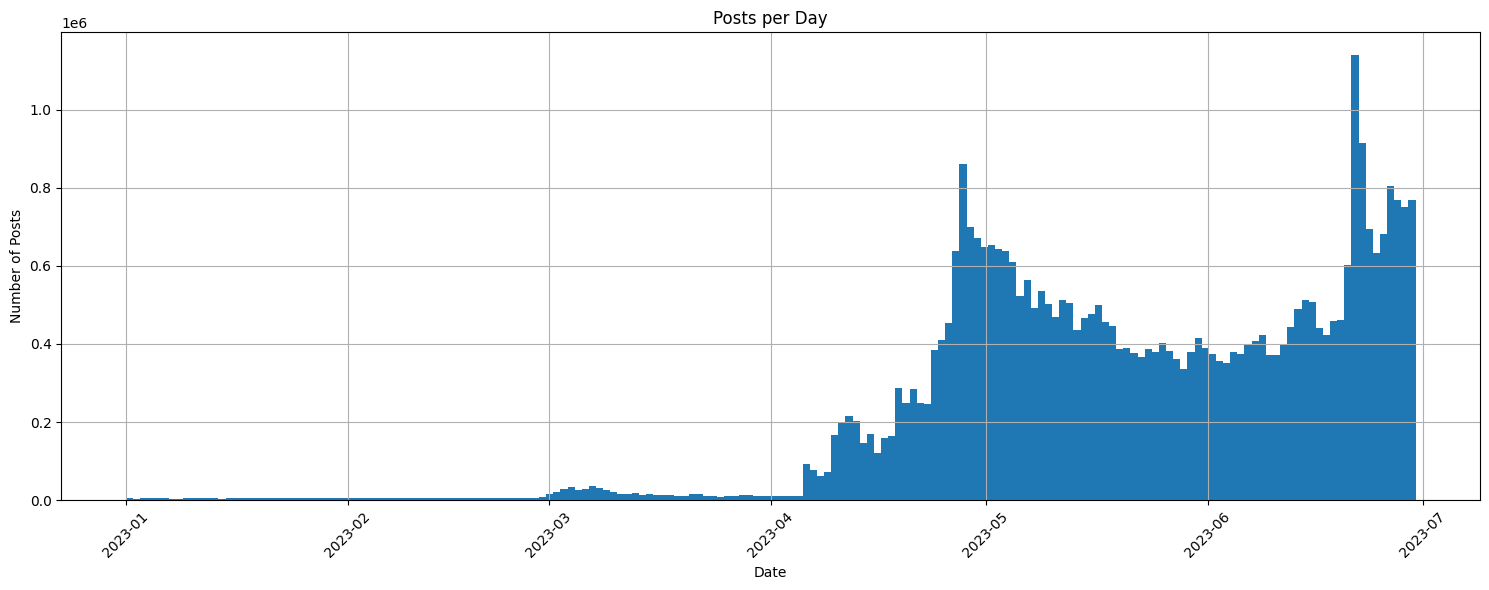

In [16]:
import matplotlib.pyplot as plt

# Get the data
df = con.execute("""
    SELECT 
        date_trunc('day', createdAt) as post_date,
        COUNT(*) as posts_count
    FROM records
    WHERE createdAt >= '2023-01-01'
    GROUP BY date_trunc('day', createdAt)
    ORDER BY post_date ASC
""").fetchdf()

# Create the plot
plt.figure(figsize=(15, 6))
plt.hist(df['post_date'], weights=df['posts_count'], bins=len(df))
plt.title('Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Follows
con.execute("""
SELECT 
    COUNT(*) as total_follows,
    COUNT(DISTINCT repo) as unique_followers,
    ROUND(AVG(follows_per_user)) as avg_follows,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY follows_per_user) as median_follows
FROM (
    SELECT 
        repo,
        COUNT(*) as follows_per_user
    FROM records 
    WHERE collection = 'app.bsky.graph.follow'
    GROUP BY repo
)
""").fetchdf()

,total_follows,unique_followers,avg_follows,median_follows
0,142095,142095,52.0,13.0


In [18]:
likes_df = con.execute("""
        SELECT 
            'at://' || repo || '/app.bsky.feed.like/' || rkey as interaction_uri,
            createdAt
        FROM records 
        WHERE collection = 'app.bsky.feed.like'
            AND createdAt < '2023-05-01'
    """).fetchdf()
print(likes_df.shape)
likes_df.head()

(3618997, 2)


,interaction_uri,createdAt
0,at://did:plc:42kmtf65uqs765coei7bimwx/app.bsky.feed.like/3ju7xbomxzo2w,2023-04-25 20:53:03.947
1,at://did:plc:42kmtf65uqs765coei7bimwx/app.bsky.feed.like/3jumsneq2im2p,2023-04-30 23:34:44.283
2,at://did:plc:7bo3bipb4qeg43bm5v5oawlu/app.bsky.feed.like/3jstlrmyobk27,2023-04-08 05:30:05.770
3,at://did:plc:7bo3bipb4qeg43bm5v5oawlu/app.bsky.feed.like/3jstltqe3vs2u,2023-04-08 05:31:15.136
4,at://did:plc:7bo3bipb4qeg43bm5v5oawlu/app.bsky.feed.like/3jsvzzulh3s2k,2023-04-09 04:50:34.121


In [19]:
posts_df = con.execute("""
    SELECT json_extract_string(record, '$.subject.uri') as subject_uri, createdAt
    FROM records
    WHERE collection = 'app.bsky.feed.post' AND createdAt < '2023-05-01';
""").fetchdf()
print(posts_df.shape)
posts_df.head()

(23345998, 2)


,subject_uri,createdAt
0,None,2012-12-24 15:42:47
1,None,2012-12-24 18:15:48
2,None,2013-01-04 05:23:02
3,None,2013-01-04 05:34:28
4,None,2013-01-07 19:35:32


In [20]:
con.execute("""
SELECT repo, rkey, createdAt
FROM records
WHERE collection = 'app.bsky.feed.post' AND createdAt < '2023-05-01';
""").fetchdf()


,repo,rkey,createdAt
0,did:plc:u5ao2li37xwae6pzmai2ydd6,3lb3i44n6wk2s,2012-12-24 15:42:47.000
1,did:plc:u5ao2li37xwae6pzmai2ydd6,3lb3i4bn53s2s,2012-12-24 18:15:48.000
2,did:plc:u5ao2li37xwae6pzmai2ydd6,3lb3i4gnelf2p,2013-01-04 05:23:02.000
3,did:plc:u5ao2li37xwae6pzmai2ydd6,3lb3i4lorl72c,2013-01-04 05:34:28.000
4,did:plc:u5ao2li37xwae6pzmai2ydd6,3lb3i4qph4g24,2013-01-07 19:35:32.000
...,...,...,...
23345993,did:plc:vsuxs6ypzxz6kmj4ylj2id7s,3jucxs3yark2h,2023-04-27 01:40:13.840
23345994,did:plc:vsuxs6ypzxz6kmj4ylj2id7s,3jucxwqmpsk2e,2023-04-27 01:42:49.699
23345995,did:plc:vsuxs6ypzxz6kmj4ylj2id7s,3jucxx5fdy22e,2023-04-27 01:43:03.095
23345996,did:plc:vsuxs6ypzxz6kmj4ylj2id7s,3jueqycx42u2v,2023-04-27 18:43:46.095


In [21]:
con.execute("""
SELECT rkey as post_id
FROM records
WHERE collection = 'app.bsky.feed.like'
    AND createdAt < '2023-05-01'   
            """).fetch_df()

,post_id
0,3ju7xbomxzo2w
1,3jumsneq2im2p
2,3jstlrmyobk27
3,3jstltqe3vs2u
4,3jsvzzulh3s2k
...,...
3618992,3jslys7nwsk2n
3618993,3jtfhsk4bk52s
3618994,3jujglwlodl2o
3618995,3jujzwzz4uk24
